In [82]:
import pandas as pd
import numpy as np


train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")

In [83]:
X_test, X_train =  test.drop('selling_price', axis=1), train.drop('selling_price', axis=1), 
ytrain,ytest = train.selling_price, test.selling_price

In [84]:
print(f'Число пропусков ytrain {ytrain.isna().sum()}')

Число пропусков ytrain 299


In [85]:
miss = ytrain.isna()
ytrain= ytrain.drop(ytrain[miss].index)
X_train= X_train.drop(X_train[miss].index)

In [86]:
print(f'Число пропусков ytrain {ytrain.isna().sum()}')

Число пропусков ytrain 0


In [87]:
def feature_extraction(value):
    try:
        value = float(value.split(' ')[0])
        return value
    except:
        return None

In [88]:
X_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [89]:
columns = ['mileage', 'engine', 'max_power']
for column in columns:
    X_train[column] = X_train[column].apply(lambda x: feature_extraction(x))
    X_test[column] = X_test[column].apply(lambda x: feature_extraction(x))

In [90]:
X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
6,Maruti 800 DX BSII,2001.0,5000.0,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4.0


In [91]:
X_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96 Nm at 3000 rpm,5.0


In [92]:
X_train[['mileage', 'engine' , 'max_power']].info()
X_test[['mileage', 'engine' , 'max_power']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6997
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    6497 non-null   float64
 1   engine     6497 non-null   float64
 2   max_power  6503 non-null   float64
dtypes: float64(3)
memory usage: 209.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    981 non-null    float64
 1   engine     981 non-null    float64
 2   max_power  981 non-null    float64
dtypes: float64(3)
memory usage: 23.6 KB


In [93]:
new_Xtrain = X_train[['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']]
New_Xtest = X_test[['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']]

In [94]:
X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
6,Maruti 800 DX BSII,2001.0,5000.0,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4.0


In [95]:
new_Xtrain.isna().sum()

year           0
km_driven      0
seats        202
engine       202
mileage      202
max_power    196
dtype: int64

In [96]:
New_Xtest.isna().sum()

year          0
km_driven     0
seats        19
engine       19
mileage      19
max_power    19
dtype: int64

In [97]:
from sklearn.impute import SimpleImputer
columns=New_Xtest.columns 
imputer = SimpleImputer(strategy='mean')
imputer.fit(new_Xtrain)
new_Xtrain =pd.DataFrame(imputer.transform(new_Xtrain),columns=columns)
New_Xtest =pd.DataFrame(imputer.transform(New_Xtest),columns=columns)

In [98]:
new_Xtrain.isna().sum()

year         0
km_driven    0
seats        0
engine       0
mileage      0
max_power    0
dtype: int64

In [99]:
New_Xtest.isna().sum()

year         0
km_driven    0
seats        0
engine       0
mileage      0
max_power    0
dtype: int64

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model_len = LinearRegression()
model_forester = RandomForestRegressor(random_state=42)

model_len.fit(new_Xtrain,ytrain)
model_forester.fit(new_Xtrain,ytrain)

pred_len_test = model_len.predict(New_Xtest)
pred_forester_test = model_forester.predict(New_Xtest)

pred_len_train = model_len.predict(new_Xtrain)
pred_forester_train = model_forester.predict(new_Xtrain)

r2_len_test = r2_score(ytest,pred_len_test)
r2_forester_test = r2_score(ytest,pred_forester_test)

r2_len_train = r2_score(ytrain,pred_len_train)
r2_forester_train = r2_score(ytrain,pred_forester_train)


print(f'Train {model_len}: {r2_len_train}, {model_forester}: {r2_forester_train}')
print(f'Test {model_len}: {r2_len_test}, {model_forester}: {r2_forester_test}')

Train LinearRegression(): 0.6406490031417004, RandomForestRegressor(random_state=42): 0.9941011030227218
Test LinearRegression(): 0.6485839251280094, RandomForestRegressor(random_state=42): 0.9629520400960621


In [101]:
print(f'Модель {model_forester} обучилась лучше на {r2_forester_test-r2_len_test}')

Модель RandomForestRegressor(random_state=42) обучилась лучше на 0.3143681149680526


In [103]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': np.arange(20, 100, 10),
    'max_depth': np.arange(2, 10, 2),
    'max_features': ['log2', 'sqrt', None],
    'min_samples_leaf': np.arange(1, 10, 1),
    'min_samples_split': np.arange(1, 11, 2)
}
gs = GridSearchCV(estimator=RandomForestRegressor(),
    param_grid=params,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1)

gs.fit(new_Xtrain,ytrain)

print(f'Best score: {gs.best_score_}')
print(f'Best params: {gs.best_params_}')

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2592 fits failed out of a total of 12960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2592 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\79292\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\79292\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\79292\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\79292\anaconda3\Lib\site-

Best score: 0.9502683419567192
Best params: {'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [104]:
model_forester_up = RandomForestRegressor(n_estimators=50, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=5)

model_forester_up.fit(new_Xtrain,ytrain)
predict_train_up = model_forester_up.predict(new_Xtrain) 
predict_test_up = model_forester_up.predict(New_Xtest) 

r2_train_up = r2_score(ytrain,predict_train_up)
r2_test_up = r2_score(ytest,predict_test_up)

print(f'{model_len} Train : {r2_train_up}, test: {r2_test_up}')  

LinearRegression() Train : 0.9775306471890757, test: 0.9558545433259407


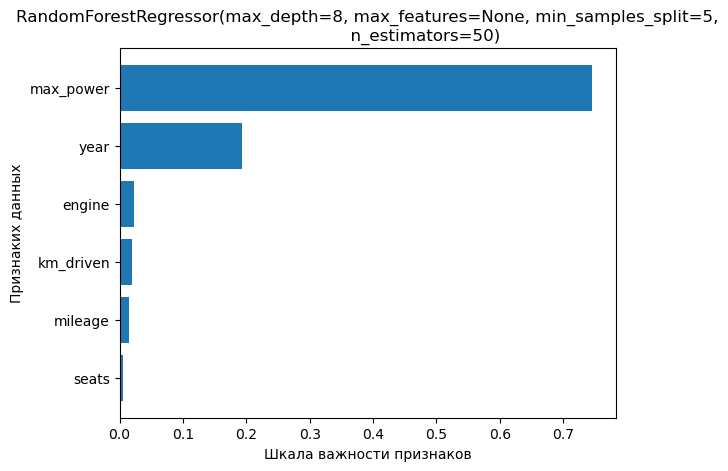

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

featuer = model_forester_up.feature_importances_
featuer_agr = np.argsort(featuer)
names = new_Xtrain.columns

plt.title(model_forester_up)
plt.barh(range(len(featuer_agr)), featuer[featuer_agr])
plt.yticks(range(len(featuer_agr)), names[featuer_agr])
plt.xlabel('Шкала важности признаков')
plt.ylabel('Признаких данных');